In [53]:
# Imports:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, mean_absolute_error, mean_squared_error, r2_score, accuracy_score, classification_report, confusion_matrix
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LogisticRegression

In [54]:
# Firstly lets create a function that will train a logistic Regression model with speicified parameters
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

def train_logistic_regression(x_train, y_train, regularization_type='l2', regularization_strength=1.0,
                              normalization=False, pca=False, default=False):
    """
    Train a logistic regression model with flexible parameter settings.
    
    Parameters:
    x_train (array): Training data features.
    y_train (array): Training data target.
    regularization_type (str): Type of regularization ('l1', 'l2', 'none'). Default is 'l2'.
    regularization_strength (float): Inverse of regularization strength. Larger values specify 
                                     weaker regularization. Default is 1.0.
    normalization (bool): If True, apply standard normalization to features.
    pca (bool): If True, apply PCA to reduce dimensionality.
    default (bool): If True, use default basic settings for the model.
    
    Returns:
    model: Trained logistic regression model.
    """
    if default:
        # Use default settings: l2 regularization, no normalization, no PCA, default C=1.0
        model = LogisticRegression()
    else:
        steps = []
        # Add normalization if requested
        if normalization:
            steps.append(('normalize', StandardScaler()))
        
        # Add PCA if requested
        if pca:
            steps.append(('pca', PCA(n_components=0.95)))  # Retaining 95% of variance

        # Configure regularization type and strength
        if regularization_type not in ['l1', 'l2', 'none']:
            raise ValueError("Regularization type must be 'l1', 'l2', or 'none'")
        if regularization_type == 'none':
            penalty = 'none'
        else:
            penalty = regularization_type
        
        # Append logistic regression model with specified configurations
        steps.append(('logistic_regression', LogisticRegression(penalty=penalty, C=regularization_strength,
                                                                solver='saga' if penalty in ['l1', 'l2'] else 'lbfgs')))
        
        # Create pipeline
        model = Pipeline(steps=steps)
    
    # Train the model
    model.fit(x_train, y_train)
    return model

# Example usage:
# x_train = np.array([...])
# y_train = np.array([...])
# model = train_logistic_regression(x_train, y_train, regularization_type='l1', regularization_strength=0.5,
#                                   normalization=True, pca=True, default=False)


In [65]:
import matplotlib.pyplot as plt
from sklearn.metrics import (confusion_matrix, classification_report, roc_curve, auc, log_loss,
                             precision_recall_curve, average_precision_score)
import seaborn as sns
import numpy as np

def evaluate_logistic_regression_model(X_train, X_test, y_train, y_test, model):
    """
    Evaluates the performance of a logistic regression model and generates a comprehensive report.
    
    Parameters:
    X_train, X_test, y_train, y_test: training and testing data
    model: a trained logistic regression model
    """
    # Predict on test data
    y_pred = model.predict(X_test)
    y_pred_prob = model.predict_proba(X_test)[:, 1]
    
    # Basic Classification Metrics
    print(classification_report(y_test, y_pred))
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(8, 8))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title('Confusion Matrix')
    plt.ylabel('Actual Label')
    plt.xlabel('Predicted Label')
    plt.show()

    # ROC Curve and AUC
    fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
    plt.figure(figsize=(8, 8))
    plt.plot(fpr, tpr, label=f'AUC = {auc(fpr, tpr):.2f}')
    plt.plot([0, 1], [0, 1], 'r--')
    plt.title('ROC Curve')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

    # Precision-Recall Curve and Average Precision
    precision, recall, thresholds_pr = precision_recall_curve(y_test, y_pred_prob)
    avg_precision = average_precision_score(y_test, y_pred_prob)
    plt.figure(figsize=(8, 8))
    plt.plot(recall, precision, label=f'Average Precision = {avg_precision:.2f}')
    plt.title('Precision-Recall Curve')
    plt.xlabel('Recall')
    plt.ylabel('Precision')
    plt.legend(loc='lower left')
    plt.show()

    # Log Loss
    print(f'Log Loss: {log_loss(y_test, y_pred_prob):.4f}')

    # ... More metrics and graphs can be added similarly

    # Model Parameters and Hyperparameters
    print("Model Hyperparameters:")
    print(model.get_params())

    # Feature Importance or Coefficients
    feature_names = X_train.columns.tolist()
    print( feature_names )

    if hasattr(model, 'coef_'):
        plt.figure(figsize=(15, 10))  # Increased figure size for clarity
        importance = model.coef_[0]
        plt.bar(feature_names, importance)
        plt.title('Feature Importance')
        plt.xlabel('Feature')
        plt.ylabel('Importance')
        # plt.xticks(rotation=90)  # Rotate feature names to be vertical
        plt.tight_layout()  # Adjust layout
        plt.show()
    else:
        print("No coefficients found in model")
            
    # Model Insights and Conclusions
    # ... (interpret the above metrics and graphs, potentially a longer text-based explanation)
    pass

# Example usage:
# trained_model = LogisticRegression().fit(X_train, y_train)
# evaluate_logistic_regression_model(X_train, X_test, y_train, y_test, trained_model)


In [56]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
import numpy as np

def optimize_logistic_regression(x, y):
    """
    Test various combinations of parameters to find the best configuration for the logistic regression model.
    
    Parameters:
    x (array): Full dataset features.
    y (array): Full dataset targets.
    
    Returns:
    best_setup: Dictionary containing the best configuration.
    best_accuracy: Highest accuracy achieved.
    """
    # Split the data into training and testing sets
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
    
    # Define the parameter grid
    regularization_types = ['l1', 'l2']
    regularization_strengths = [0.01, 0.1, 1, 10, 100]
    normalizations = [True, False]
    pcas = [True, False]
    
    best_accuracy = 0
    best_setup = {}
    
    # Iterate over all possible combinations of parameters
    for reg_type in regularization_types:
        for reg_strength in regularization_strengths:
            for normalize in normalizations:
                for pca in pcas:
                    # Train the model with the current combination of parameters
                    model = train_logistic_regression(x_train, y_train, regularization_type=reg_type,
                                                      regularization_strength=reg_strength, normalization=normalize, pca=pca)
                    # Predict on the testing set
                    y_pred = model.predict(x_test)
                    # Calculate accuracy
                    accuracy = accuracy_score(y_test, y_pred)
                    # Print the combination and its accuracy
                    print(f"Type: {reg_type}, Strength: {reg_strength}, Normalize: {normalize}, PCA: {pca}, Accuracy: {accuracy}")
                    
                    # Update best configuration if current one is better
                    if accuracy > best_accuracy:
                        best_accuracy = accuracy
                        best_setup = {
                            'regularization_type': reg_type,
                            'regularization_strength': reg_strength,
                            'normalization': normalize,
                            'pca': pca
                        }
    
    return best_setup, best_accuracy

# Example usage:
# Assuming x and y are your datasets:
# best_setup, best_accuracy = optimize_logistic_regression(x, y)



In [57]:
# Load the dataset
df = pd.read_csv( "smoke_detection_iot.csv" )

# Drop the unnecessary columns
data = df.drop( [ 'Index', 'UTC', 'CNT' ], axis=1 )

# Split the data into features ( X ) and target variable ( Y )
x_features = data.drop( 'Fire Alarm', axis=1 )
y_target = data[ 'Fire Alarm' ]

# Split data into training and testing sets ( 80% training, 20% testing )
x_train, x_test, y_train, y_test = train_test_split( x_features, y_target, test_size=0.2 )

In [62]:
# # Tune the logistic regression model
best_setup, best_accuracy = optimize_logistic_regression(x_features, y_target)
print(f"Best setup: {best_setup}")
print(f"Best accuracy: {best_accuracy}")

Type: l1, Strength: 0.01, Normalize: True, PCA: True, Accuracy: 0.8486348395337697


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Type: l1, Strength: 0.01, Normalize: True, PCA: False, Accuracy: 0.8880728085581989
Type: l1, Strength: 0.01, Normalize: False, PCA: True, Accuracy: 0.7544307839693437


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Type: l1, Strength: 0.01, Normalize: False, PCA: False, Accuracy: 0.8824844323806482


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Type: l1, Strength: 0.1, Normalize: True, PCA: True, Accuracy: 0.8541433817659269


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Type: l1, Strength: 0.1, Normalize: True, PCA: False, Accuracy: 0.8953376975890148
Type: l1, Strength: 0.1, Normalize: False, PCA: True, Accuracy: 0.7545106179147374


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Type: l1, Strength: 0.1, Normalize: False, PCA: False, Accuracy: 0.8824844323806482


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Type: l1, Strength: 1, Normalize: True, PCA: True, Accuracy: 0.8547820533290755


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Type: l1, Strength: 1, Normalize: True, PCA: False, Accuracy: 0.8958965352067699
Type: l1, Strength: 1, Normalize: False, PCA: True, Accuracy: 0.7544307839693437


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Type: l1, Strength: 1, Normalize: False, PCA: False, Accuracy: 0.8824844323806482


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Type: l1, Strength: 10, Normalize: True, PCA: True, Accuracy: 0.8549417212198627


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Type: l1, Strength: 10, Normalize: True, PCA: False, Accuracy: 0.8958167012613764
Type: l1, Strength: 10, Normalize: False, PCA: True, Accuracy: 0.7544307839693437


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Type: l1, Strength: 10, Normalize: False, PCA: False, Accuracy: 0.8824844323806482


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Type: l1, Strength: 100, Normalize: True, PCA: True, Accuracy: 0.8549417212198627


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Type: l1, Strength: 100, Normalize: True, PCA: False, Accuracy: 0.8958167012613764
Type: l1, Strength: 100, Normalize: False, PCA: True, Accuracy: 0.7544307839693437


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Type: l1, Strength: 100, Normalize: False, PCA: False, Accuracy: 0.8824844323806482
Type: l2, Strength: 0.01, Normalize: True, PCA: True, Accuracy: 0.8534248762573846
Type: l2, Strength: 0.01, Normalize: True, PCA: False, Accuracy: 0.8835222736707649
Type: l2, Strength: 0.01, Normalize: False, PCA: True, Accuracy: 0.7544307839693437


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Type: l2, Strength: 0.01, Normalize: False, PCA: False, Accuracy: 0.8824844323806482
Type: l2, Strength: 0.1, Normalize: True, PCA: True, Accuracy: 0.8535845441481718


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Type: l2, Strength: 0.1, Normalize: True, PCA: False, Accuracy: 0.8942200223535047
Type: l2, Strength: 0.1, Normalize: False, PCA: True, Accuracy: 0.7544307839693437


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Type: l2, Strength: 0.1, Normalize: False, PCA: False, Accuracy: 0.8824844323806482


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Type: l2, Strength: 1, Normalize: True, PCA: True, Accuracy: 0.854702219383682


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Type: l2, Strength: 1, Normalize: True, PCA: False, Accuracy: 0.8960562030975571
Type: l2, Strength: 1, Normalize: False, PCA: True, Accuracy: 0.7544307839693437


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Type: l2, Strength: 1, Normalize: False, PCA: False, Accuracy: 0.8824844323806482


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Type: l2, Strength: 10, Normalize: True, PCA: True, Accuracy: 0.8548618872744691


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Type: l2, Strength: 10, Normalize: True, PCA: False, Accuracy: 0.8958167012613764
Type: l2, Strength: 10, Normalize: False, PCA: True, Accuracy: 0.7544307839693437


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Type: l2, Strength: 10, Normalize: False, PCA: False, Accuracy: 0.8824844323806482


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Type: l2, Strength: 100, Normalize: True, PCA: True, Accuracy: 0.8549417212198627


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


Type: l2, Strength: 100, Normalize: True, PCA: False, Accuracy: 0.8958167012613764
Type: l2, Strength: 100, Normalize: False, PCA: True, Accuracy: 0.7544307839693437
Type: l2, Strength: 100, Normalize: False, PCA: False, Accuracy: 0.8824844323806482
Best setup: {'regularization_type': 'l2', 'regularization_strength': 1, 'normalization': True, 'pca': False}
Best accuracy: 0.8960562030975571


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


              precision    recall  f1-score   support

           0       0.94      0.63      0.75      3555
           1       0.87      0.98      0.92      8971

    accuracy                           0.88     12526
   macro avg       0.91      0.81      0.84     12526
weighted avg       0.89      0.88      0.88     12526



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


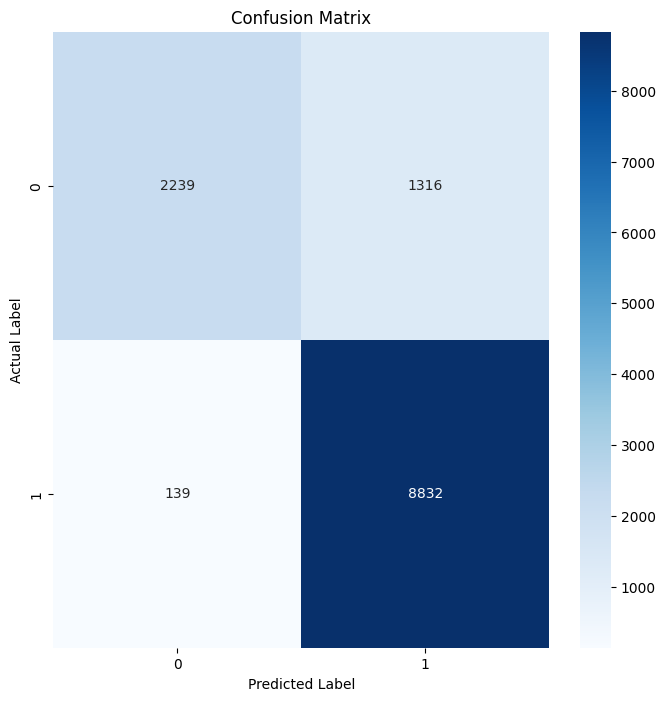

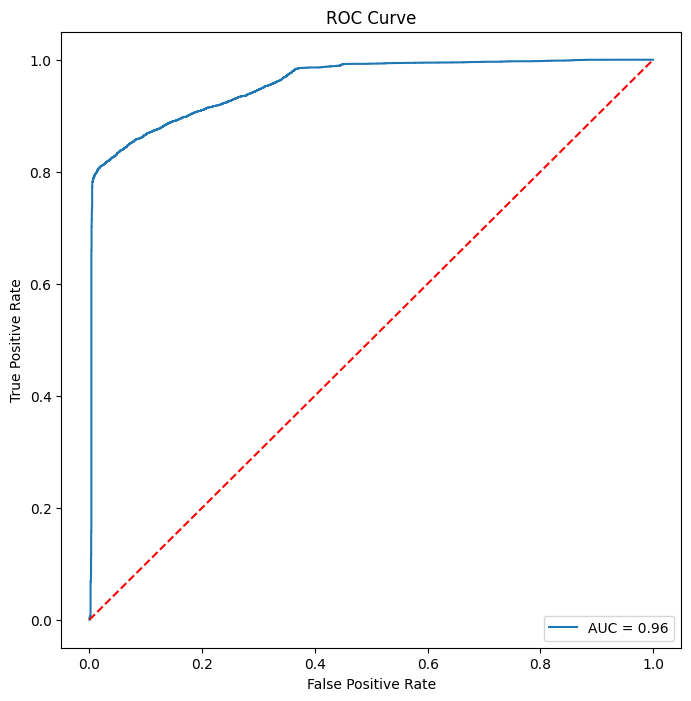

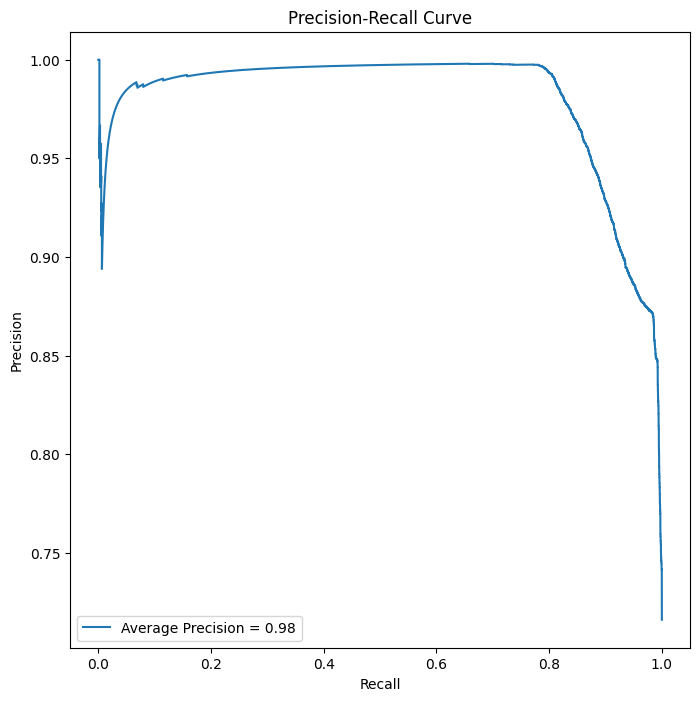

Log Loss: 0.2855
Model Hyperparameters:
{'C': 1.0, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'auto', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'lbfgs', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}
['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]', 'Raw H2', 'Raw Ethanol', 'Pressure[hPa]', 'PM1.0', 'PM2.5', 'NC0.5', 'NC1.0', 'NC2.5']


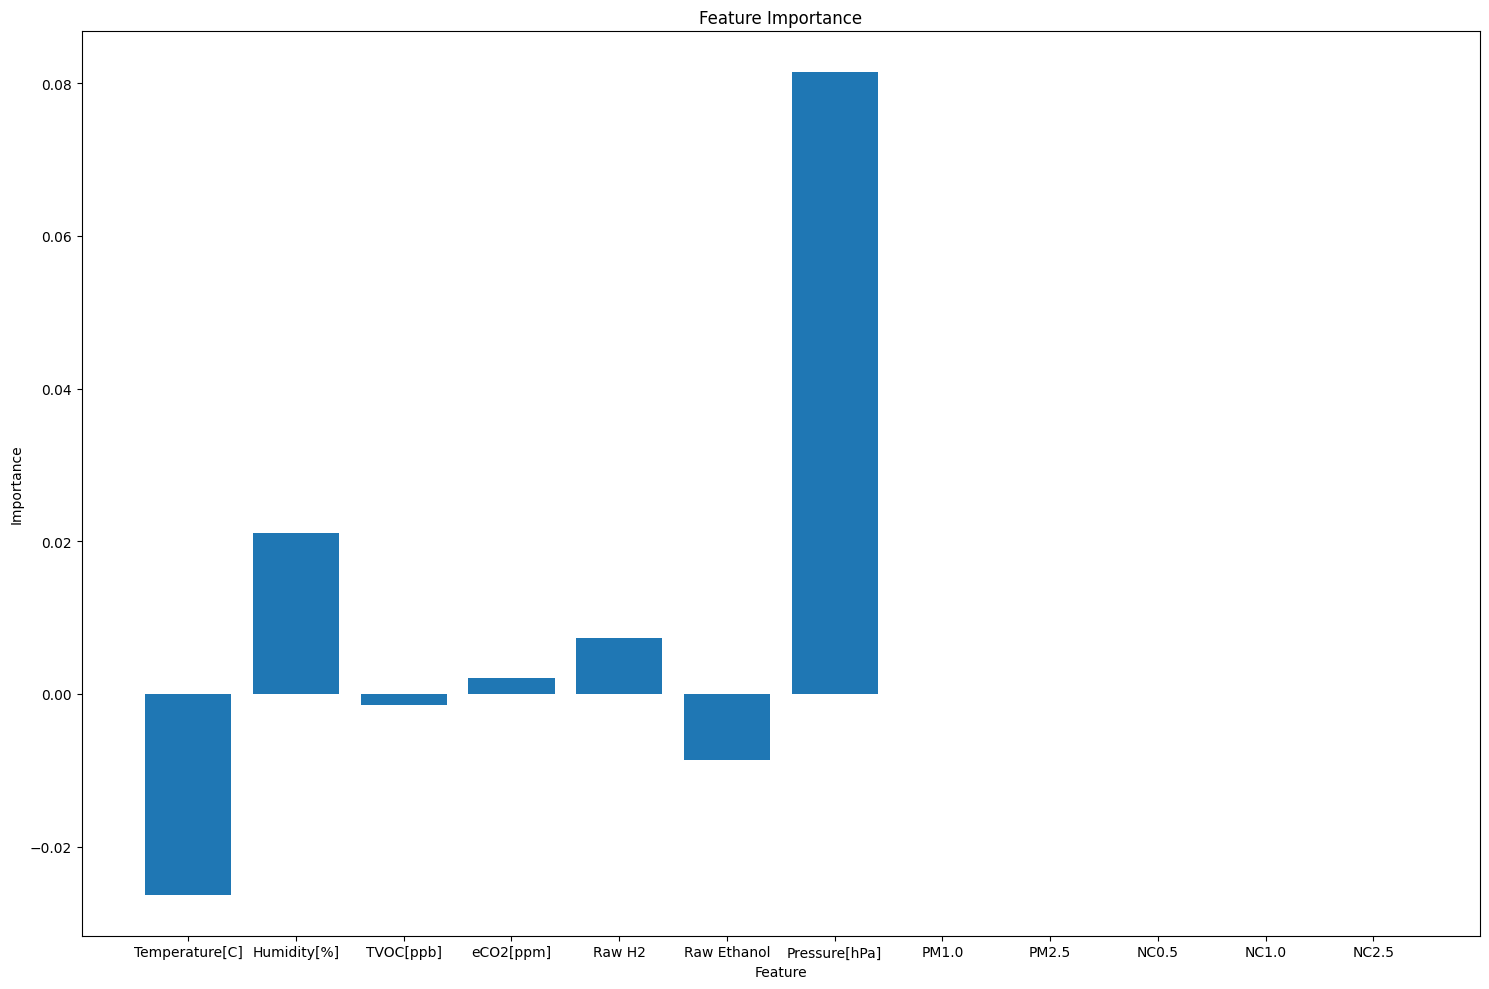

In [59]:
# # Train a logistic regression model with default settings
evaluate_logistic_regression_model( x_train, x_test, y_train, y_test, train_logistic_regression(x_train, y_train, default=True) )
# evaluate_logistic_regression_model( x_train, x_test, y_train, y_test, train_logistic_regression(x_train, y_train, regularization_type='l1', regularization_strength=0.01, normalization=True, pca=True ) )

# # Tune the logistic regression model
# best_model = tune_logistic_regression(x_train, y_train)

# # Train a logistic regression model with default settings
# model_default = train_logistic_regression(x_train, y_train, regularization_type='l2', regularization_strength=20, normalization=True, pca=True )

# # Evaluate the model
# y_pred_default = model_default.predict(x_test)
# evaluate_regression_model(y_test, y_pred_default)
# print("Accuracy on Testing Set (Random Forest):", accuracy_score(y_test, y_pred_default))
# print("Classification Report (Random Forest):")
# print(classification_report(y_test, y_pred_default))
# print("Confusion Matrix:")
# print(confusion_matrix(y_test, y_pred_default))

              precision    recall  f1-score   support

           0       0.87      0.75      0.80      3555
           1       0.90      0.95      0.93      8971

    accuracy                           0.90     12526
   macro avg       0.89      0.85      0.87     12526
weighted avg       0.89      0.90      0.89     12526



/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/sklearn/linear_model/_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


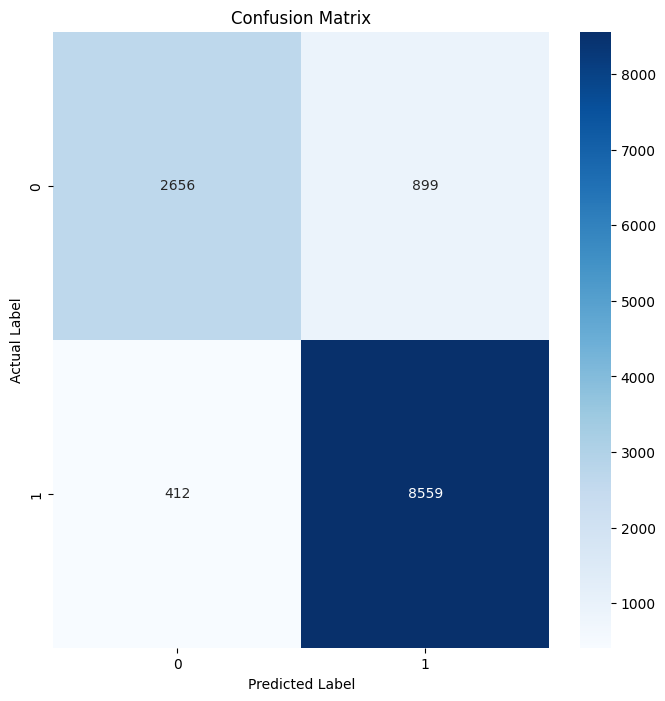

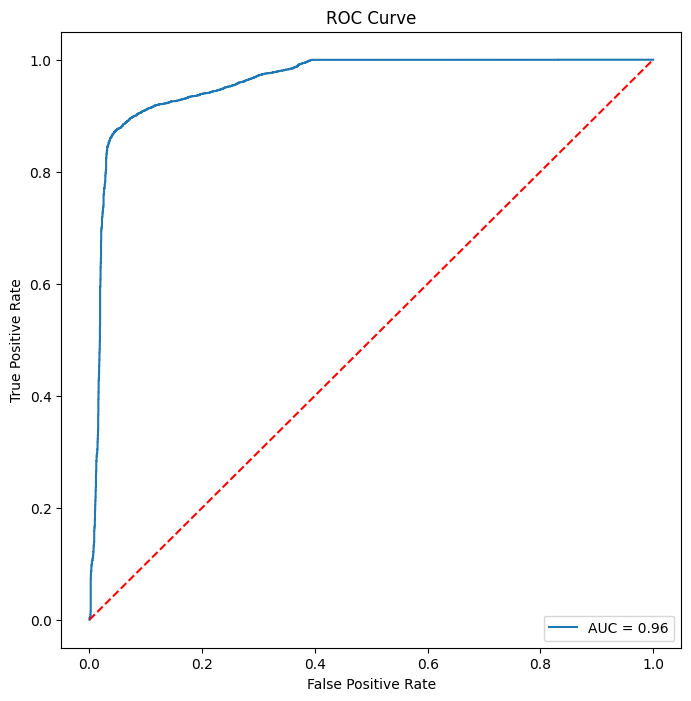

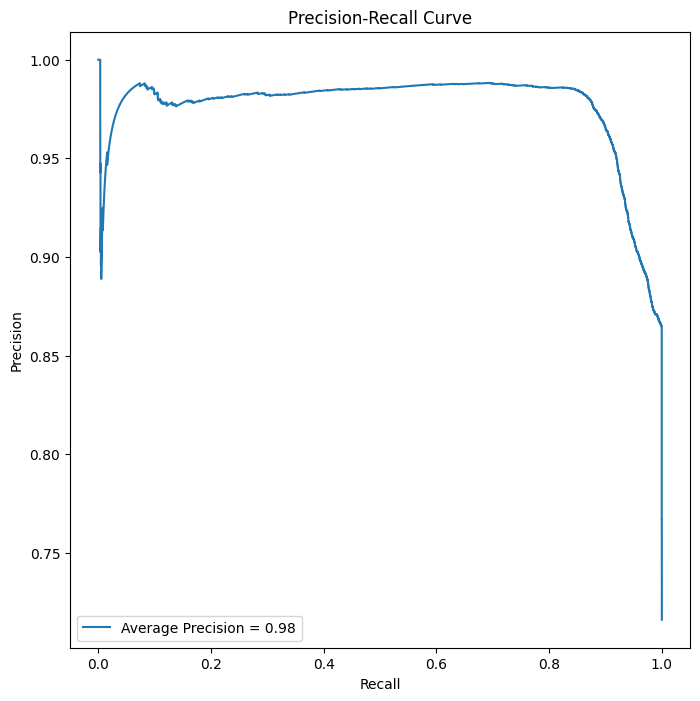

Log Loss: 0.2136
Model Hyperparameters:
{'memory': None, 'steps': [('normalize', StandardScaler()), ('logistic_regression', LogisticRegression(solver='saga'))], 'verbose': False, 'normalize': StandardScaler(), 'logistic_regression': LogisticRegression(solver='saga'), 'normalize__copy': True, 'normalize__with_mean': True, 'normalize__with_std': True, 'logistic_regression__C': 1.0, 'logistic_regression__class_weight': None, 'logistic_regression__dual': False, 'logistic_regression__fit_intercept': True, 'logistic_regression__intercept_scaling': 1, 'logistic_regression__l1_ratio': None, 'logistic_regression__max_iter': 100, 'logistic_regression__multi_class': 'auto', 'logistic_regression__n_jobs': None, 'logistic_regression__penalty': 'l2', 'logistic_regression__random_state': None, 'logistic_regression__solver': 'saga', 'logistic_regression__tol': 0.0001, 'logistic_regression__verbose': 0, 'logistic_regression__warm_start': False}
['Temperature[C]', 'Humidity[%]', 'TVOC[ppb]', 'eCO2[ppm]'

In [66]:
# # Train a logistic regression model with default settings
evaluate_logistic_regression_model( x_train, x_test, y_train, y_test, train_logistic_regression(x_train, y_train, regularization_type='l2', regularization_strength=1.0, normalization=True, pca=False ) )